# Projeto WPT Eletromagnetismo - 2023.2 - Prof. Carlos Marmo
#### - Gustavo Eliziario Stevenson de Oliveira
#### - Alberto Carrera
#### - Pedro Civita
#### - Bruno Falcao
#### - Rafael Niccheri

In [74]:
#Imports para o projeto
import numpy as np
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt
from math import *

### Fun√ß√µes do projeto WPT (Wireless Power Transfer)

In [75]:
# R1, R2, Rc => Resist√™ncias das bobinas prim√°rias e secund√°rias
# L1 = L2 = L => A indut√¢ncia das bobinas √© igual
# M = sqrt(L1*L2) => Indut√¢ncia m√∫tua
# C1 = C2 = C => A capacit√¢ncia dos capacitores √© igual
# k => Coeficiente de acoplamento

#Fun√ß√£o para c√°lculo da corrente no prim√°rio e secund√°rio
def CalcularTransformador_projeto(Uf, R1, R2, Rc, L, C, k, f):
    w = 2*pi*f
    XL = 1j*w*L
    XC = 1/(1j*w*C)
    M = k*L
    XM = 1j*w*M
    Z=np.array([[R1+XL+XC, -XM],[-XM, XL+R2+((Rc*XC)/(Rc+XC))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

def CalcularTransformador_projeto2(Uf, R1, R2, Rc, L1, L2, C, k, f):
    if f == 0:
        # Retorna zeros ou None para indicar que o c√°lculo foi ignorado
        return 0, 0, 0
    w = 2 * pi * f

    xl1 = w * L1 * 1j
    xl2 = w * L2 * 1j
    xc = 1 / (w * C * 1j) if w * C != 0 else np.inf*1j

    m = k * sqrt(L1 * L2)
    xm = m * w * 1j
    
    Z = np.array([[R1 + xl1 + xc, -xm], [-xm, xl2 + R2 + 1 / (1 / Rc + 1 / xc if w * C != 0 else 0)]])
    V = np.array([Uf, 0])
    I = np.dot(linalg.inv(Z), V)

    Zeq = 1 / (1 / Rc + 1 / xc) if w * C != 0 else Rc
    V2 = I[1] * Zeq

    return I[0], I[1], V2

def CalculaFrequenciaRessonancia(L, C):
    if L == 0 or C == 0:
        # Retorna zero ou None para indicar que o c√°lculo foi ignorado
        return 0
    
    return 1 / (2 * pi * sqrt(L * C))

# Fun√ß√£o para calcular a pot√™ncia real ajustada para ignorar valores zero
def Calcula_Potencia(V, i):
    if V == 0 or i == 0:
        # Retorna zero para indicar que n√£o h√° pot√™ncia
        return 0
    return V / sqrt(2) * i.conjugate() / sqrt(2)

# Fun√ß√£o para calcular a efici√™ncia ajustada para ignorar valores zero
def calcula_eficiencia(S1, S2):
    if S1.real == 0:
        # Retorna zero para indicar que a efici√™ncia n√£o pode ser calculada
        return 0
    return S2.real / S1.real

def annot_max(x,y, ax=None): # Fun√ß√£o para anotar o ponto m√°ximo do gr√°fico
    ymax = max(y)
    xmax = x[y.index(ymax)]
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

### 1. Elaborando diagrama do modelo eletronico do circuito WPT
Essa atividade tem objetivo de especificar o modelo eletrodin√¢mico WPT por meio de um circuito. Para isso, o modelo do transformador deve ser adaptado de modo a considerar o par√¢metro $k$ e os capacitores $C_1$ e $C_2$, lembrado que $C_1$ deve estar em serie com a bobina prim√°ria, e $C_2$ em paralelo com a secund√°ria. No projeto, iremos considerar que as bobinas s√£o de mesma dimens√µes, portanto $L_1 = L_2$. Do mesmo modo que os capacitores devem ser iguais ($C_1 = C_2$), de modo que a frequ√™ncia de resson√¢ncia dos conjuntos $LC$ seja a mesma no prim√°rio e no secund√°rio.
#### Modelo do circuito feito no CircuitLab
https://www.circuitlab.com/circuit/jvdk2ygpev75/circuito_eletromag/

### 3. Constru√ß√£o de gr√°ficos de $\hat I_1$ e $\hat I_2$ em fun√ß√£o da frequ√™ncia

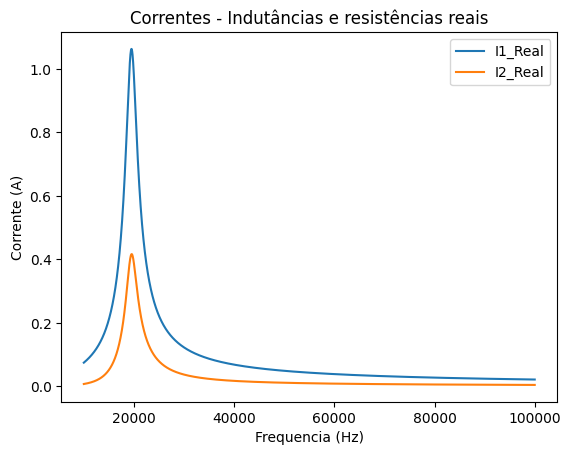

Corrente m√°xima no prim√°rio: 1.0626543493197185 A

Corrente m√°xima no secund√°rio: 0.4164299648063748 A

A frequ√™ncia em que a corrente √© m√°xima √© 19513.951395139513 Hz


In [76]:
lista_freq = np.linspace(10000, 100000, 10000)
maior_valor = 0
lista_i1 = []
lista_i2 = []
L = 0.0004387
C = 150e-9

R1 = 1.620
R2 = 1.771
L1 = 0.0004622
L2 = 0.0004622
Rc = 100
K_ideal = 0.198# Est√° no √∫ltimo bloco do c√≥digo - f = 20000 kHz
v_real = 9*2/pi

# ---------------- Valores Reais ---------------- 

lista_i1_2 = []
lista_i2_2 = []


for freq in lista_freq:
    I1_1, I2_1, _ = CalcularTransformador_projeto2(v_real, R1, R2, Rc, L1, L2, C, K_ideal, freq)
    lista_i1_2.append(abs(I1_1))
    lista_i2_2.append(abs(I2_1))

plt.title('Correntes - Indut√¢ncias e resist√™ncias reais')
plt.plot(lista_freq, lista_i1_2, label="I1_Real")
plt.plot(lista_freq, lista_i2_2, label="I2_Real")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Corrente (A)")
plt.legend()
plt.show()

print(f'Corrente m√°xima no prim√°rio: {max(lista_i1_2)} A\n')
print(f'Corrente m√°xima no secund√°rio: {max(lista_i2_2)} A\n')
print(f'A frequ√™ncia em que a corrente √© m√°xima √© {lista_freq[lista_i1_2.index(max(lista_i1_2))]} Hz')

### 4. Constru√ß√£o de um gr√°fico do m√≥dulo da tens√£o $V_2$ pela frequ√™ncia de resson√¢ncia, para 6 diferentes indut√¢ncias e para 5 diferentes capacitores (An√°lise para chegar na nossa montagem da bobina)

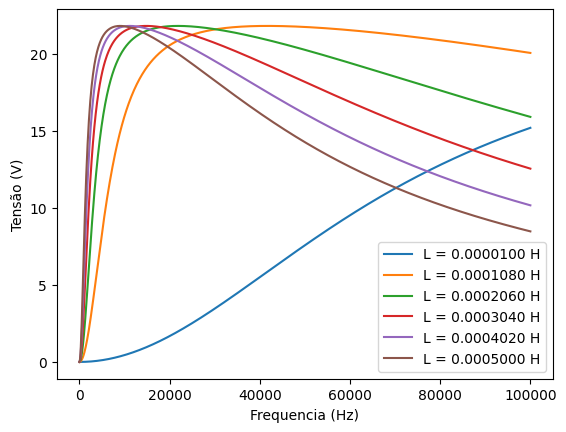

In [77]:
#Criando uma lista para as legendas do gr√°fico
lista_L = np.linspace(10e-6, 500e-6, 6)
lista_legendas = []
for l in lista_L:
    legenda = str("L = {:.7f} H".format(l))
    lista_legendas.append(legenda)

Rc = 100
lista_freq_r = np.linspace(1, 100000, 1000)
lista_V2 = []

for l in lista_L:
    lista_V2_individual = []
    for freq in lista_freq_r:
        # C√°lculo da capacit√¢ncia
        C = 1/((freq**2)*(4*pi**2)*l)
        I1, I2 = CalcularTransformador_projeto(v_real, 1, 1, Rc, l, C, 0.2, freq)
        #C√°lculo da tens√£o no secund√°rio
        XC = 1/(1j*freq*2*pi*C)
        V2 = I2*((Rc*XC)/(Rc+XC))
        lista_V2_individual.append(abs(V2))
    lista_V2.append(lista_V2_individual)

# Plot de V2 por freq para cada valor de L
lista_L = list(lista_L)
i = 0
for lista_V2_individual in lista_V2:
    # lista_freq_r = lista_freq_r[]
    # lista_V2_individual = lista_V2_individual[]
    plt.plot(lista_freq_r, lista_V2_individual, label=lista_legendas[i])
    i += 1
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Tens√£o (V)")
#plt.xlim(1, 20000)
plt.legend()
plt.show()


Capacitor de capacit√¢ncia: 0.1e-6 F
Frequ√™ncia em que a tens√£o no secund√°rio √© m√°xima: 56256.69369369369

Capacitor de capacit√¢ncia: 150e-9 F
Frequ√™ncia em que a tens√£o no secund√°rio √© m√°xima: 37538.16216216216

Capacitor de capacit√¢ncia: 1e-6 F
Frequ√™ncia em que a tens√£o no secund√°rio √© m√°xima: 5606.549549549549

Capacitor de capacit√¢ncia: 4.7e-6 F
Frequ√™ncia em que a tens√£o no secund√°rio √© m√°xima: 1202.1891891891892

Capacitor de capacit√¢ncia: 0.47e-6 F
Frequ√™ncia em que a tens√£o no secund√°rio √© m√°xima: 12012.891891891892



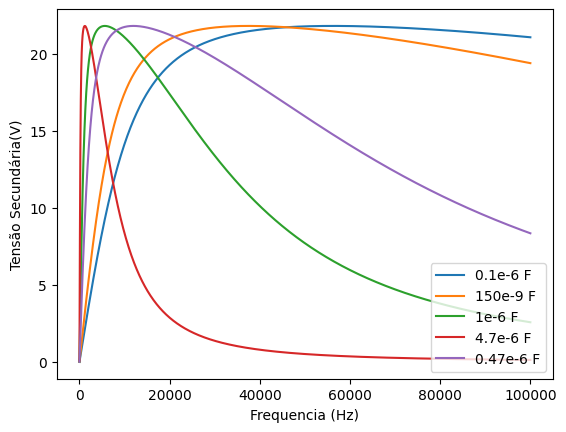

In [78]:
Rc = 100
lista_freq_r = np.linspace(1, 100000, 1000)
lista_V2 = []
lista_C = [0.1e-6, 150e-9, 1e-6, 4.7e-6, 0.47e-6]
for C in lista_C:
    lista_V2_individual = []
    for freq in lista_freq_r:
        # C√°lculo da capacit√¢ncia
        L = 1/((freq**2)*(4*pi**2)*C)
        I1, I2 = CalcularTransformador_projeto(v_real, 1, 1, Rc, L, C, 0.2, freq)
        #C√°lculo da tens√£o no secund√°rio
        XC = 1/(1j*freq*2*pi*C)
        V2 = I2*((Rc*XC)/(Rc+XC))
        lista_V2_individual.append(abs(V2))
    lista_V2.append(lista_V2_individual)

# Criando uma lista para as legendas do gr√°fico
lista_legendas = ["0.1e-6 F", "150e-9 F", "1e-6 F", "4.7e-6 F", "0.47e-6 F"]

# Plot de V2 por freq para cada valor de L
i = 0
for lista_V2_individual in lista_V2:
    print(f'Capacitor de capacit√¢ncia: {lista_legendas[i]}')
    index_max = lista_V2_individual.index(max(lista_V2_individual))
    print(f'Frequ√™ncia em que a tens√£o no secund√°rio √© m√°xima: {lista_freq_r[index_max]}\n')
    plt.plot(lista_freq_r, lista_V2_individual, label=lista_legendas[i])
    i += 1
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Tens√£o Secund√°ria(V)")
# plt.xlim(1, 20000)
plt.legend(loc='lower right')
plt.show()

In [79]:
# Usaremos o capacitor de 150nF (F pico = 19.620,42 Hz) para calcular a indut√¢ncia
C = 150e-9
freq = 19620.42342342342
L = 1/((freq**2)*(4*pi**2)*C)
print(f'A indut√¢ncia para o capacitor de 150nF: {L:.7f} H')
print(f'A indut√¢ncia para o capacitor de 150nF (aproximado): {L*1000:.2f} mH')

A indut√¢ncia para o capacitor de 150nF: 0.0004387 H
A indut√¢ncia para o capacitor de 150nF (aproximado): 0.44 mH


In [80]:
freq_ressonancia = CalculaFrequenciaRessonancia(L, C)
freq_r_og = 19620.42342342342
print(f'A frequ√™ncia de resson√¢ncia para o capacitor de 150nF: {freq_ressonancia.real} Hz')

A frequ√™ncia de resson√¢ncia para o capacitor de 150nF: 19620.423423423417 Hz


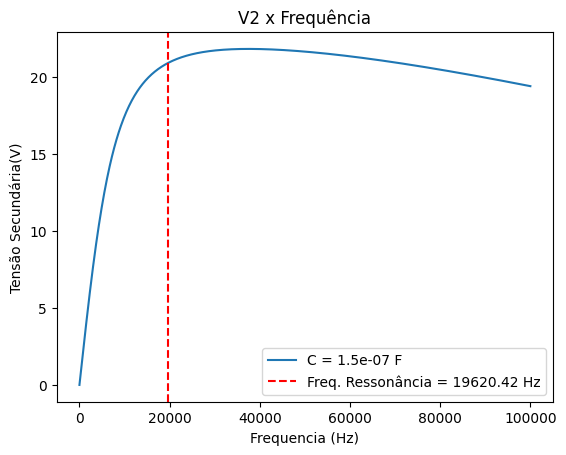

In [81]:
Rc = 100
C = 150e-9
lista_freq = np.linspace(1, 100000, 1000)
lista_V2 = []

# C√°lculo para cada frequ√™ncia
for freq in lista_freq:
    L = 1/((freq**2)*(4*pi**2)*C)
    I1, I2 = CalcularTransformador_projeto(v_real, 1, 1, Rc, L, C, 0.2, freq)
    XC = 1/(1j*freq*2*pi*C)
    V2 = I2*((Rc*XC)/(Rc+XC))
    lista_V2.append(abs(V2))

# Encontrar a frequ√™ncia de resson√¢ncia (m√°xima tens√£o no secund√°rio)
freq_max = lista_freq[np.argmax(lista_V2)]

# Plotagem do gr√°fico
plt.plot(lista_freq, lista_V2, label=f"C = {C} F")
plt.axvline(x=freq_ressonancia.real, color='r', linestyle='--')
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Tens√£o Secund√°ria(V)")
plt.legend([f"Freq. Resson√¢ncia = {freq_ressonancia.real:.2f} Hz"], loc='lower right')
# Truque para adicionar legenda √† linha vertical
plt.plot([], [], color='r', linestyle='--', label=f"Freq. Resson√¢ncia = {freq_ressonancia.real:.2f} Hz")
plt.legend(loc='lower right')
plt.title("V2 x Frequ√™ncia")
plt.show()

### 5. Constru√ß√£o de gr√°ficos das pot√™ncias e da efici√™ncia em fun√ß√£o da frequ√™ncia

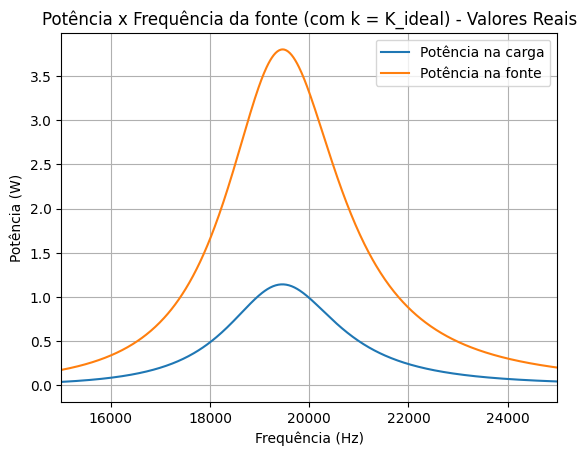

Pot√™ncia m√°xima para k=K_ideal: 1.14 W


In [82]:
lista_iRC = []
lista_eficiencia = []
lista_potencia_carga = []
lista_potencia_fonte = []

lista_potencia_carga_2 = []
lista_potencia_fonte_2 = []
lista_eficiencia_2 = []

L = 0.0004622
L1 = 0.0004622
L2 = 0.0004622
C = 150e-9
Rc = 100
Uf = rect(9, 0)
uf_simulado = 9*2/pi
incerteza = 1.5 #Ohms

lista_freq = np.linspace(10e3, 200e3, 10500)

#Calculando pot√™ncia e efici√™ncia em fun√ß√£o da frequ√™ncia.
for f in lista_freq:
    i1, i2 = CalcularTransformador_projeto(uf_simulado, 1, 1, Rc, L, C, 0.2, f)
    w = 2*pi*f
    Pot = (Calcula_Potencia(Uf, i1)).real
    lista_potencia_fonte.append(Pot)

    Z_eq_carga = ((1/(1j*w*C))*Rc)/((1/(1j*w*C))+Rc)
    V_carga = i2*Z_eq_carga
    I_Rc = V_carga/Rc
    Pot_carga = (Calcula_Potencia(V_carga, I_Rc)).real

    #Adiciona os resultados na lista
    lista_potencia_carga.append(Pot_carga)
    lista_eficiencia.append(calcula_eficiencia(Pot, Pot_carga))


    # ------------------- Valores Reais ------------------- #

    #Calculando novamente para os valores reais
    i1_2, i2_2, _ = CalcularTransformador_projeto2(uf_simulado, R1 + incerteza, R2 + incerteza, Rc, L1, L2, C, K_ideal, f)
    Pot_2 = (Calcula_Potencia(Uf, i1_2)).real
    lista_potencia_fonte_2.append(Pot_2)

    Z_eq_carga_2 = ((1/(1j*w*C))*Rc)/((1/(1j*w*C))+Rc)
    V_carga_2 = i2_2*Z_eq_carga_2
    I_Rc_2 = V_carga_2/Rc
    Pot_carga_2 = (Calcula_Potencia(V_carga_2, I_Rc_2)).real

    #Adiciona os resultados na lista
    lista_potencia_carga_2.append(Pot_carga_2)
    lista_eficiencia_2.append(calcula_eficiencia(Pot_2, Pot_carga_2))


#Plotando a efici√™ncia em fun√ß√£o da frequ√™ncia - Valores Reais
plt.plot(lista_freq, lista_potencia_carga_2, label="Pot√™ncia na carga")
plt.plot(lista_freq, lista_potencia_fonte_2, label="Pot√™ncia na fonte")
plt.title("Pot√™ncia x Frequ√™ncia da fonte (com k = K_ideal) - Valores Reais")
plt.xlabel("Frequ√™ncia (Hz)")
plt.ylabel("Pot√™ncia (W)")
plt.xlim(15000, 25000)
plt.legend()
plt.grid(True)
plt.show()

print(f'Pot√™ncia m√°xima para k=K_ideal: {max(lista_potencia_carga_2):.2f} W')

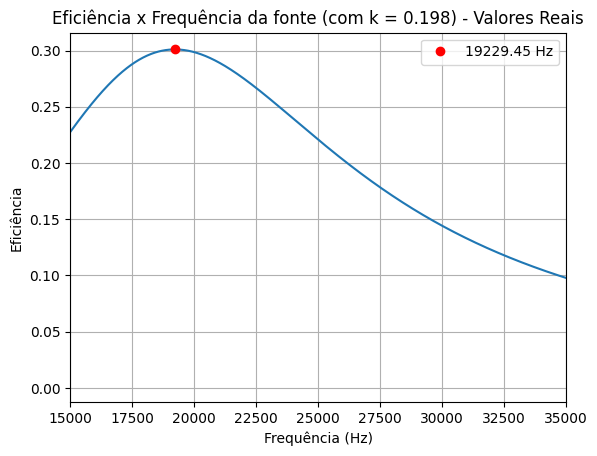

A efici√™ncia m√°xima para k = K_ideal: 30.0%


In [83]:
#Utilizando a lista de efici√™ncia do item anterior - Valores Reais
plt.plot(lista_freq, lista_eficiencia_2)
i = lista_eficiencia_2.index(max(lista_eficiencia_2))
plt.plot(lista_freq[i], lista_eficiencia_2[i], 'ro', label=f'{round(lista_freq[i], 2)} Hz')
plt.title("Efici√™ncia x Frequ√™ncia da fonte (com k = 0.198) - Valores Reais")
plt.xlabel("Frequ√™ncia (Hz)")
plt.ylabel("Efici√™ncia")
plt.xlim(15000, 35000)
plt.legend()
plt.grid(True)
plt.show()

print(f'A efici√™ncia m√°xima para k = K_ideal: {round(max(lista_eficiencia_2), 2)*100}%')


### 6. Constru√ß√£o de um gr√°fico que relacione o valor de pico da tens√£o no secund√°rio (no resistor $ùëÖ_ùê∂$) com o coeficiente de acoplamento $k$

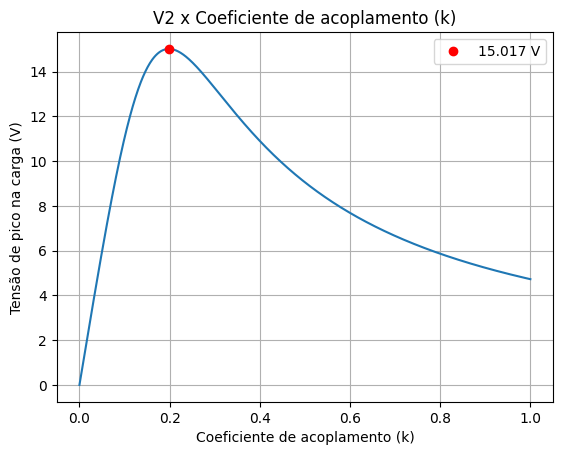

O valor de k para a tens√£o de pico na carga ser m√°xima √© 0.1981981981981982

A tens√£o de pico na carga √© 15.017206586654494 V

A resist√™ncia utilizada para o modelo para o prim√°rio e para o secund√°rio foi de 3.120 e 3.271 Ohms, respectivamente.


In [84]:
# Retomando Valores Reais
C = 150e-9
Rc = 100
Uf = rect(9, 0)
V_entrada = 9*2/pi

freq_r = 1/(2*pi*sqrt(L*C))
lista_k = np.linspace(0, 1, 1000)
lista_tensao_pico = []
lista_tensao_pico_2 = []

for k_novo in lista_k:
    i1, i2 = CalcularTransformador_projeto(V_entrada, 1, 1, Rc, L, C, k_novo, freq_r)
    w = 2*pi*freq_r
    Z_eq_carga = ((1/(1j*w*C))*Rc)/((1/(1j*w*C))+Rc)
    V_carga = i2*Z_eq_carga
    lista_tensao_pico.append(abs(V_carga))


    # ------------------- Valores Reais ------------------- #

    f2 = 19620.42 #Frequ√™ncia real de opera√ß√£o - 20kHz
    i1_2, i2_2, _ = CalcularTransformador_projeto2(V_entrada, R1 + incerteza, R2 + incerteza, Rc, L1, L2, C, k_novo, f2)
    w_2 = 2*pi*f2
    Z_eq_carga_2 = ((1/(1j*w_2*C))*Rc)/((1/(1j*w_2*C))+Rc)
    V_carga_2 = i2_2*Z_eq_carga_2
    lista_tensao_pico_2.append(abs(V_carga_2))


i = lista_tensao_pico_2.index(max(lista_tensao_pico_2))

plt.plot(lista_k, lista_tensao_pico_2)
plt.plot(lista_k[i], lista_tensao_pico_2[i], 'ro', label=f'{round(lista_tensao_pico_2[i], 3)} V')
plt.title("V2 x Coeficiente de acoplamento (k)")
plt.xlabel("Coeficiente de acoplamento (k)")
plt.ylabel("Tens√£o de pico na carga (V)")
plt.legend()
plt.grid(True)
plt.show()

i = lista_tensao_pico_2.index(max(lista_tensao_pico_2))

k = lista_k[i]

print(f'O valor de k para a tens√£o de pico na carga ser m√°xima √© {k}\n')
print(f'A tens√£o de pico na carga √© {max(lista_tensao_pico_2)} V\n')
print(f'A resist√™ncia utilizada para o modelo para o prim√°rio e para o secund√°rio foi de {R1+incerteza:.3f} e {R2+incerteza:.3f} Ohms, respectivamente.')


### Resultados da Trasmiss√£o de Energia do projeto f√≠sico
#### Transmiss√£o mais potente
d =  3,5cm
<br/>
V pico a pico = 31V
<br/>
V_max = 15.5V

#### Trasmiss√£o mais distante
d = 20 cm
<br/>
V pico a pico = 1,2V
<br/> 
V_max =  600mV

## Potencia

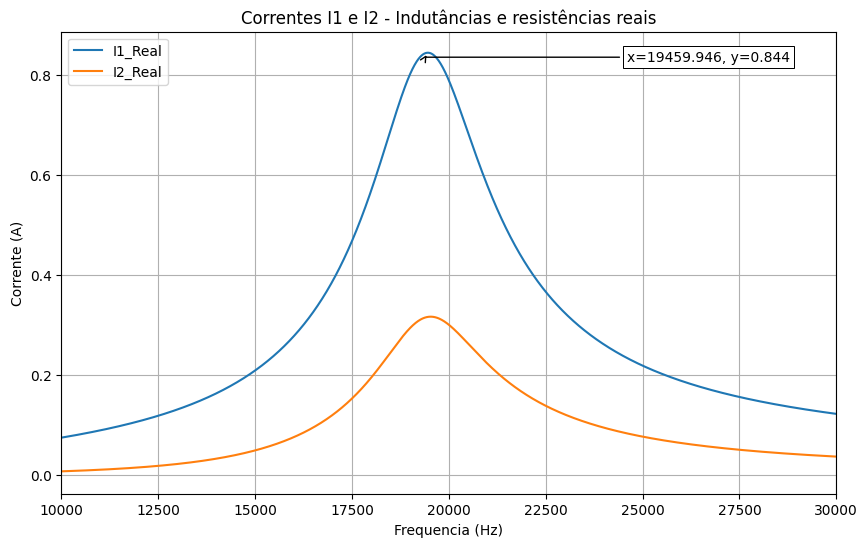

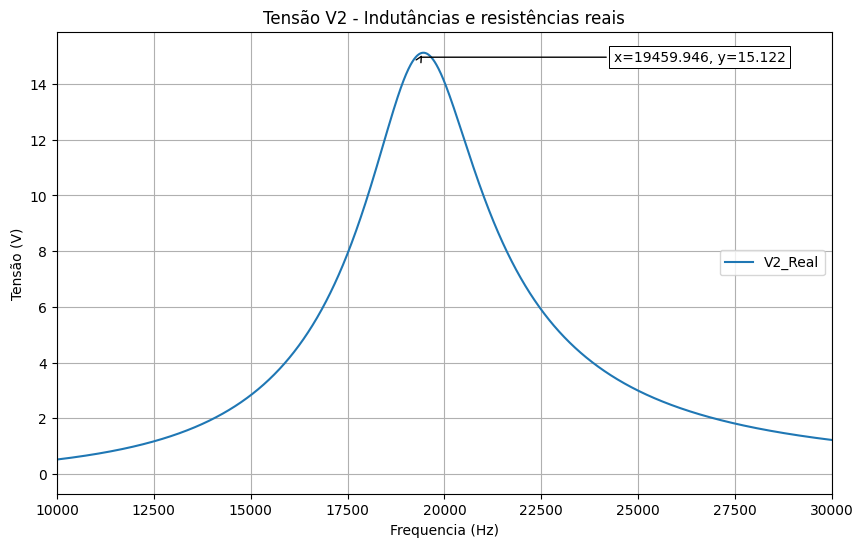

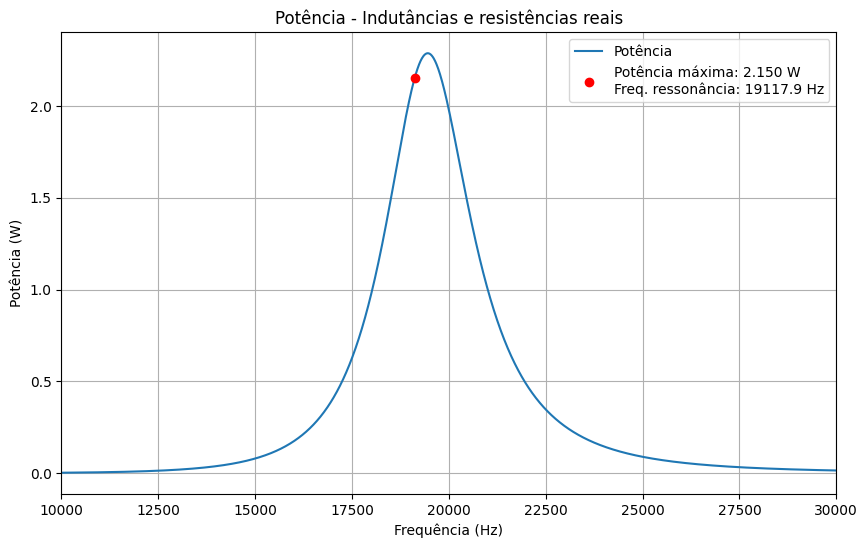

Frequ√™ncia de resson√¢ncia: 19114.349889781566 Hz
Pot√™ncia m√°xima na frequ√™ncia de resson√¢ncia: 2.150 W


In [85]:
# Par√¢metros do circuito
R1 = 1.620
R2 = 1.771
L1 = 0.0004622
L2 = 0.0004622
Rc = 100
K_ideal = 0.1981981981981982
C = 150e-9
lista_freq = np.linspace(10000, 100000, 10000)

# Listas para armazenar valores
lista_i1_2 = []
lista_i2_2 = []
lista_v2_2 = []

# C√°lculo de I1, I2 e V2 para cada frequ√™ncia
for freq in lista_freq:
    I1_1, I2_1, V2_1 = CalcularTransformador_projeto2(V_entrada, R1 + incerteza, R2 + incerteza, Rc, L1, L2, C, K_ideal, freq)
    lista_i1_2.append(abs(I1_1))
    lista_i2_2.append(abs(I2_1))
    lista_v2_2.append(abs(V2_1))

# Plotagem de I1 e I2
plt.figure(figsize=(10, 6))
plt.plot(lista_freq, lista_i1_2, label="I1_Real")
plt.plot(lista_freq, lista_i2_2, label="I2_Real")
plt.title('Correntes I1 e I2 - Indut√¢ncias e resist√™ncias reais')
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Corrente (A)")
plt.xlim(10000, 30000)
annot_max(lista_freq, lista_i1_2)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

# Plotagem de V2
plt.figure(figsize=(10, 6))
plt.plot(lista_freq, lista_v2_2, label="V2_Real")
plt.title('Tens√£o V2 - Indut√¢ncias e resist√™ncias reais')
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Tens√£o (V)")
plt.xlim(10000, 30000)
annot_max(lista_freq, lista_v2_2)
plt.legend(loc = 'center right')
plt.grid(True)
plt.show()

# potencia maxima na frequencia de ressonancia
freq_ressonancia = CalculaFrequenciaRessonancia(L1, C)
# Encontrar o √≠ndice mais pr√≥ximo da frequ√™ncia de resson√¢ncia
i_ressonancia = np.argmin(np.abs(lista_freq - freq_ressonancia))

# Plotagem de Potencia (W) em fun√ß√£o da frequ√™ncia
lista_potencia = np.array(lista_v2_2)**2 / Rc
i_max_potencia = np.argmax(lista_potencia)

plt.figure(figsize=(10, 6))
plt.plot(lista_freq, lista_potencia, label="Pot√™ncia")

# Ponto de pot√™ncia m√°xima na frequ√™ncia de resson√¢ncia
pot_max_na_ressonancia = lista_potencia[i_ressonancia]
freq_na_ressonancia = lista_freq[i_ressonancia]

plt.plot(freq_na_ressonancia, pot_max_na_ressonancia, 'ro', 
         label=f'Pot√™ncia m√°xima: {pot_max_na_ressonancia:.3f} W\nFreq. resson√¢ncia: {freq_na_ressonancia:.1f} Hz')

plt.title('Pot√™ncia - Indut√¢ncias e resist√™ncias reais')
plt.xlabel("Frequ√™ncia (Hz)")
plt.ylabel("Pot√™ncia (W)")
plt.xlim(10000, 30000)
plt.legend()
plt.grid(True)
plt.show()

print(f'Frequ√™ncia de resson√¢ncia: {freq_ressonancia.real} Hz')
print(f'Pot√™ncia m√°xima na frequ√™ncia de resson√¢ncia: {lista_potencia[i_ressonancia]:.3f} W')

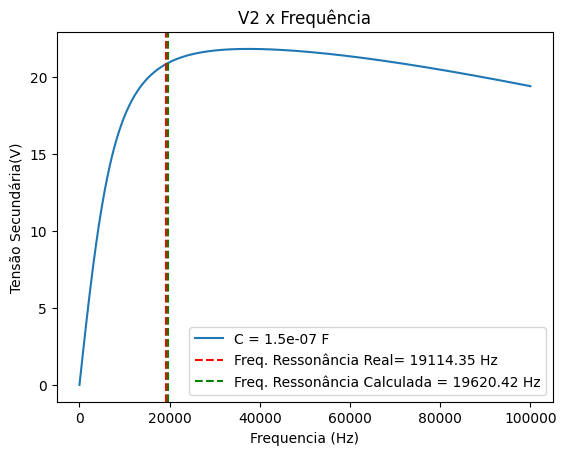

In [86]:
# V2 x Frequencia com nova frequencia de ressonancia

Rc = 100
C = 150e-9
lista_freq = np.linspace(1, 100000, 1000)
lista_V2 = []

# C√°lculo para cada frequ√™ncia
for freq in lista_freq:
    L = 1/((freq**2)*(4*pi**2)*C)
    I1, I2 = CalcularTransformador_projeto(v_real, 1, 1, Rc, L, C, 0.2, freq)
    XC = 1/(1j*freq*2*pi*C)
    V2 = I2*((Rc*XC)/(Rc+XC))
    lista_V2.append(abs(V2))

# Encontrar a frequ√™ncia de resson√¢ncia (m√°xima tens√£o no secund√°rio)
freq_max = lista_freq[np.argmax(lista_V2)]

# Plotagem do gr√°fico
plt.plot(lista_freq, lista_V2, label=f"C = {C} F")
plt.axvline(x=freq_ressonancia.real, color='r', linestyle='--')
plt.axvline(x=freq_r_og, color='g', linestyle='--')
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Tens√£o Secund√°ria(V)")
plt.legend([f"Freq. Resson√¢ncia = {freq_ressonancia.real:.2f} Hz"], loc='lower right')
# Truque para adicionar legenda √† linha vertical
plt.plot([], [], color='r', linestyle='--', label=f"Freq. Resson√¢ncia Real= {freq_ressonancia.real:.2f} Hz")
plt.plot([], [], color='g', linestyle='--', label=f"Freq. Resson√¢ncia Calculada = {freq_r_og:.2f} Hz")
plt.legend(loc='lower right')
plt.title("V2 x Frequ√™ncia")
plt.show()

### 7 - Potencias reais em fun√ß√£o de R1 (resistencia no prim√°rio)

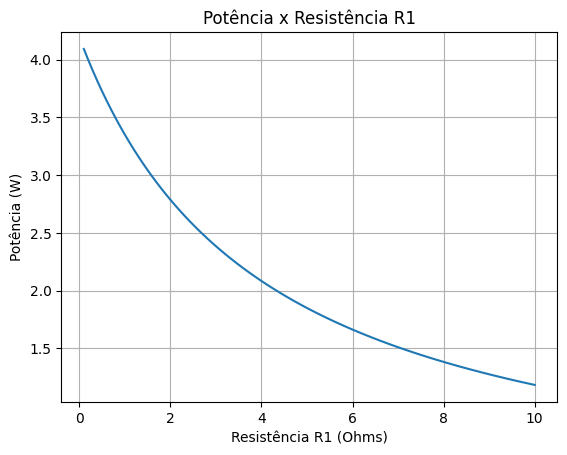

In [87]:
L = 0.0004622
L1 = 0.0004622
L2 = 0.0004622
R2 = 1.771
C = 150e-9
Rc = 100
Uf = rect(9, 0)
uf_simulado = 9*2/pi
incerteza = 1.5 #Ohms

# Intervalo de varia√ß√£o para R1
lista_R1 = np.linspace(0.1, 10, 100) # Por exemplo, de 0.1 a 10 Ohms
lista_potencia = []

for res1 in lista_R1:
    # Calcular correntes usando a fun√ß√£o apropriada
    I1, I2 = CalcularTransformador_projeto(uf_simulado, res1, R2, Rc, L, C, 0.2, freq_r_og)

    potencia = Calcula_Potencia(uf_simulado, I1) # Use os par√¢metros apropriados
    lista_potencia.append(potencia.real) # Armazenando a parte real da pot√™ncia

# Plotar o gr√°fico
plt.plot(lista_R1, lista_potencia)
plt.title("Pot√™ncia x Resist√™ncia R1")
plt.xlabel("Resist√™ncia R1 (Ohms)")
plt.ylabel("Pot√™ncia (W)")
plt.grid(True)
plt.show()

### Conclus√£o : Como as resist√™ncias no prim√°rio e secund√°rio afetam a tens√£o m√°xima transmitida pelo sistema?

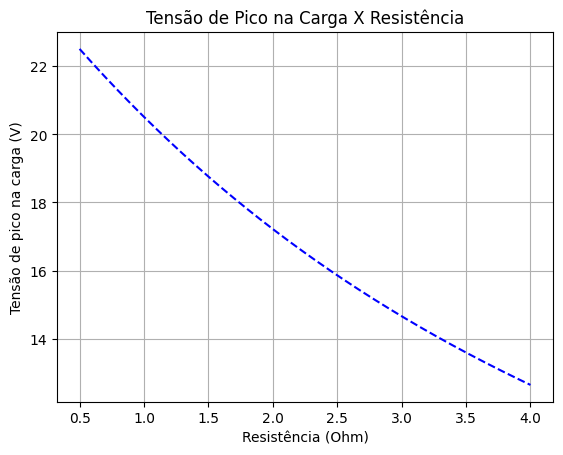

In [88]:
#Principais par√¢metros para o projeto
Rc = 100
L1 = 0.0004622
L2 = 0.0004622
C = 150e-9
k_ideal = 0.1981981981981982

# Considerando que r1 = r2 = r
lista_r = np.arange(0.5, 4.01, 0.01)
lista_tensao_max = []
lista_tensao_pico_3 = []

for r in lista_r:
    f2 = freq_ressonancia.real
    i1_2, i2_2, _ = CalcularTransformador_projeto2(V_entrada, r, r, Rc, L1, L2, C, k_ideal, f2)
    w_2 = 2*pi*f2
    Z_eq_carga_3 = ((1/(1j*w_2*C))*Rc)/((1/(1j*w_2*C))+Rc)
    V_carga_3 = i2_2*Z_eq_carga_2
    lista_tensao_pico_3.append(abs(V_carga_3))

plt.plot(lista_r, lista_tensao_pico_3, 'b--')
plt.title("Tens√£o de Pico na Carga X Resist√™ncia")
plt.xlabel("Resist√™ncia (Ohm)")
plt.ylabel("Tens√£o de pico na carga (V)")
plt.grid(True)
plt.show()